In [3]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns


# 2. Remove dodgy images

In [6]:
data_dir = 'data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\american\-Rugby-topu-amerikan-futbolu-topu-ocuk-spor-ma-standart-e-itim.jpg_Q90.jpg_.webp
Image not in ext list data\american\10327358996530.jpg
Image not in ext list data\american\110000018208908.jpg
Image not in ext list data\american\192px.svg
Image not in ext list data\american\5490cbb0b2e8139bc4dd8054a3a967363330ce02_original.jpeg
Image not in ext list data\american\616eaa24b866d-60730.webp
Image not in ext list data\american\9183390924850.jpg
Image not in ext list data\american\9599066603570.jpg
Image not in ext list data\american\9829617434674.jpg
Image not in ext list data\american\HTB1E8VGu_tYBeNjy1Xdq6xXyVXac.jpg_.webp
Image not in ext list data\american\nike-all-field-30-amerikan-futbol-topu-801729.webp
Image not in ext list data\american\vector.svg
Image not in ext list data\american\vector10.svg
Image not in ext list data\american\vector11.svg
Image not in ext list data\american\vector12.svg
Image not in ext list data\american\vector13.svg
Image 

# 3. Load Data

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 283 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

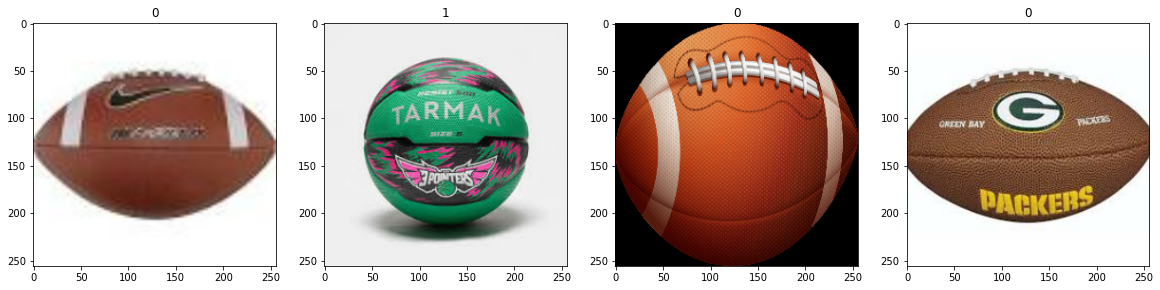

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [17]:

agırlık = []

In [30]:
model = Sequential()
model.add(Dense(3, activation='sigmoid'))
model(tf.convert_to_tensor([[1.,2.,3.]]))
agırlık.append(model.get_weights()[0][0])
model.add(Dense(1))

In [19]:
# 1. Başlangıç noktası


model.compile(tf.keras.optimizers.Adam(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histAdam = model.fit(train,batch_size=64, epochs=10, validation_data=val)

model.compile(tf.keras.optimizers.SGD(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histSGD = model.fit(train,batch_size=64, epochs=10, validation_data=val)

model.compile(tf.keras.optimizers.SGD(momentum=0.5), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histWithMoment = model.fit(train,batch_size=64, epochs=10, validation_data=val)

Epoch 1/10
6/6 [==============================] - 10s 2s/step - loss: 7.7928 - accuracy: 0.4948 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 10s 2s/step - loss: 8.4355 - accuracy: 0.4531 - val_loss: 8.1945 - val_accuracy: 0.4688
Epoch 3/10
6/6 [==============================] - 10s 1s/step - loss: 8.7569 - accuracy: 0.4323 - val_loss: 10.1226 - val_accuracy: 0.3438
Epoch 4/10
6/6 [==============================] - 9s 1s/step - loss: 8.0338 - accuracy: 0.4792 - val_loss: 10.1226 - val_accuracy: 0.3438
Epoch 5/10
6/6 [==============================] - 9s 1s/step - loss: 8.5962 - accuracy: 0.4427 - val_loss: 9.1586 - val_accuracy: 0.4062
Epoch 6/10
6/6 [==============================] - 10s 2s/step - loss: 7.5518 - accuracy: 0.5104 - val_loss: 8.6765 - val_accuracy: 0.4375
Epoch 7/10
6/6 [==============================] - 11s 2s/step - loss: 7.8732 - accuracy: 0.4896 - val_loss: 8.6765 - val_accuracy: 0.4375
Epoch 8/10
6/6 [==================

In [20]:
con = np.stack((np.array(histAdam.history['loss']),np.array(histSGD.history['loss']),np.array(histWithMoment.history['loss'])), axis=0)
print(con)

[[7.79280996 8.43551731 8.75687218 8.03382015 8.59619427 7.55179214
  7.87315035 7.79280615 7.79282951 7.95348978]
 [7.87315369 8.43550968 8.11416054 8.27483273 8.03383064 7.9534936
  8.11417007 8.27482891 8.19450378 7.63212824]
 [7.63213682 8.59619808 8.19450665 7.79281092 7.95349169 8.11416626
  8.35517788 8.11416817 8.1141634  7.39111567]]


In [22]:
# 2. Başlangıç noktası

model.compile(tf.keras.optimizers.Adam(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histAdam = model.fit(train,batch_size=64, epochs=10, validation_data=val)

model.compile(tf.keras.optimizers.SGD(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histSGD = model.fit(train,batch_size=64, epochs=10, validation_data=val)

model.compile(tf.keras.optimizers.SGD(momentum=0.5), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histWithMoment = model.fit(train,batch_size=64, epochs=10, validation_data=val)

Epoch 1/10
6/6 [==============================] - 10s 2s/step - loss: 2.1667 - accuracy: 0.4740 - val_loss: 1.9416 - val_accuracy: 0.4062
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 1.8437 - accuracy: 0.4531 - val_loss: 1.8209 - val_accuracy: 0.4375
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 1.4738 - accuracy: 0.4948 - val_loss: 1.4308 - val_accuracy: 0.4062
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 1.3055 - accuracy: 0.4740 - val_loss: 1.3753 - val_accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 1.1480 - accuracy: 0.4688 - val_loss: 1.1745 - val_accuracy: 0.4062
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 1.0689 - accuracy: 0.4844 - val_loss: 1.0905 - val_accuracy: 0.4688
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 1.0006 - accuracy: 0.4635 - val_loss: 1.0043 - val_accuracy: 0.4375
Epoch 8/10
6/6 [========================

In [23]:
con1 = np.stack((np.array(histAdam.history['loss']),np.array(histSGD.history['loss']),np.array(histWithMoment.history['loss'])), axis=0)
print(con1)

[[2.16668677 1.84371245 1.47376621 1.30546701 1.1480118  1.06889272
  1.00058591 0.92886955 0.94291908 0.88898808]
 [0.80859333 0.75692743 0.75401205 0.74397761 0.74461144 0.7410183
  0.74063945 0.74103427 0.73772007 0.73449785]
 [0.73335272 0.73192233 0.7318697  0.72518373 0.72756964 0.72415787
  0.72386384 0.72177941 0.71775579 0.71880823]]


In [25]:
# 3. Başlangıç noktası

model.compile(tf.keras.optimizers.Adam(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histAdam = model.fit(train,batch_size=64, epochs=10, validation_data=val)

model.compile(tf.keras.optimizers.SGD(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histSGD = model.fit(train,batch_size=64, epochs=10, validation_data=val)

model.compile(tf.keras.optimizers.SGD(momentum=0.5), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histWithMoment = model.fit(train,batch_size=64, epochs=10, validation_data=val)

Epoch 1/10
6/6 [==============================] - 11s 2s/step - loss: 7.5518 - accuracy: 0.5104 - val_loss: 9.1586 - val_accuracy: 0.4062
Epoch 2/10
6/6 [==============================] - 10s 2s/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 8.1945 - val_accuracy: 0.4688
Epoch 3/10
6/6 [==============================] - 10s 2s/step - loss: 7.5518 - accuracy: 0.5104 - val_loss: 6.7484 - val_accuracy: 0.5625
Epoch 4/10
6/6 [==============================] - 9s 1s/step - loss: 8.2748 - accuracy: 0.4635 - val_loss: 7.2305 - val_accuracy: 0.5312
Epoch 5/10
6/6 [==============================] - 9s 1s/step - loss: 8.5159 - accuracy: 0.4479 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 10s 2s/step - loss: 8.1945 - accuracy: 0.4688 - val_loss: 8.1945 - val_accuracy: 0.4688
Epoch 7/10
6/6 [==============================] - 10s 1s/step - loss: 7.7928 - accuracy: 0.4948 - val_loss: 6.2664 - val_accuracy: 0.5938
Epoch 8/10
6/6 [====================

In [26]:
con2 = np.stack((np.array(histAdam.history['loss']),np.array(histSGD.history['loss']),np.array(histWithMoment.history['loss'])), axis=0)
print(con2)

[[7.55179167 7.71247339 7.55179596 8.27484798 8.51586246 8.19450092
  7.79281855 8.35517788 8.27483654 7.71246862]
 [8.11417675 8.51585865 7.95347977 8.3551836  8.5962038  8.43552017
  8.03382778 8.43552113 8.27484703 8.83721352]
 [8.03382778 8.43551636 8.67653942 8.11416435 8.67653465 8.35519028
  7.71247625 8.03382397 7.79280853 8.75687122]]


In [28]:
# 4. Başlangıç noktası

model.compile(tf.keras.optimizers.Adam(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histAdam = model.fit(train,batch_size=64, epochs=10, validation_data=val)

model.compile(tf.keras.optimizers.SGD(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histSGD = model.fit(train,batch_size=64, epochs=10, validation_data=val)

model.compile(tf.keras.optimizers.SGD(momentum=0.5), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histWithMoment = model.fit(train,batch_size=64, epochs=10, validation_data=val)

Epoch 1/10
6/6 [==============================] - 11s 2s/step - loss: 7.9535 - accuracy: 0.4844 - val_loss: 9.1586 - val_accuracy: 0.4062
Epoch 2/10
6/6 [==============================] - 10s 1s/step - loss: 7.8732 - accuracy: 0.4896 - val_loss: 7.2305 - val_accuracy: 0.5312
Epoch 3/10
6/6 [==============================] - 9s 1s/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 9.1586 - val_accuracy: 0.4062
Epoch 4/10
6/6 [==============================] - 10s 2s/step - loss: 7.9535 - accuracy: 0.4844 - val_loss: 6.7484 - val_accuracy: 0.5625
Epoch 5/10
6/6 [==============================] - 11s 2s/step - loss: 8.5159 - accuracy: 0.4479 - val_loss: 8.1945 - val_accuracy: 0.4688
Epoch 6/10
6/6 [==============================] - 10s 1s/step - loss: 8.3552 - accuracy: 0.4583 - val_loss: 7.2305 - val_accuracy: 0.5312
Epoch 7/10
6/6 [==============================] - 10s 1s/step - loss: 8.1945 - accuracy: 0.4688 - val_loss: 10.1226 - val_accuracy: 0.3438
Epoch 8/10
6/6 [==================

In [29]:
con3 = np.stack((np.array(histAdam.history['loss']),np.array(histSGD.history['loss']),np.array(histWithMoment.history['loss'])), axis=0)
print(con3)

[[7.95349646 7.87315369 7.71247149 7.95349121 8.5158596  8.35518169
  8.19450855 7.95349741 8.11416531 7.71248198]
 [7.39112902 8.3551712  8.67652798 8.11416531 8.27484703 7.47147369
  8.19450188 7.87314987 8.67654133 8.19450092]
 [7.7124753  8.59619045 8.35517883 7.87314987 7.95349932 8.1141758
  8.03383541 7.79281044 7.95348787 8.11416149]]


In [31]:
# 5. Başlangıç noktası

model.compile(tf.keras.optimizers.Adam(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histAdam = model.fit(train,batch_size=64, epochs=10, validation_data=val)

model.compile(tf.keras.optimizers.SGD(), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histSGD = model.fit(train,batch_size=64, epochs=10, validation_data=val)

model.compile(tf.keras.optimizers.SGD(momentum=0.5), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
histWithMoment = model.fit(train,batch_size=64, epochs=10, validation_data=val)

Epoch 1/10
6/6 [==============================] - 10s 1s/step - loss: 7.4715 - accuracy: 0.5156 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 8s 1s/step - loss: 8.2748 - accuracy: 0.4635 - val_loss: 9.1586 - val_accuracy: 0.4062
Epoch 3/10
6/6 [==============================] - 10s 2s/step - loss: 7.9535 - accuracy: 0.4844 - val_loss: 10.1226 - val_accuracy: 0.3438
Epoch 4/10
6/6 [==============================] - 9s 1s/step - loss: 7.9535 - accuracy: 0.4844 - val_loss: 10.6047 - val_accuracy: 0.3125
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 7.9535 - accuracy: 0.4844 - val_loss: 8.6765 - val_accuracy: 0.4375
Epoch 6/10
6/6 [==============================] - 9s 1s/step - loss: 7.9535 - accuracy: 0.4844 - val_loss: 9.1586 - val_accuracy: 0.4062
Epoch 7/10
6/6 [==============================] - 11s 2s/step - loss: 8.5159 - accuracy: 0.4479 - val_loss: 8.6765 - val_accuracy: 0.4375
Epoch 8/10
6/6 [====================

In [32]:
con4 = np.stack((np.array(histAdam.history['loss']),np.array(histSGD.history['loss']),np.array(histWithMoment.history['loss'])), axis=0)
print(con4)

[[7.471457   8.27484608 7.95349121 7.95348787 7.95349741 7.95350075
  8.51586437 7.79281998 8.27483845 7.87314367]
 [8.11415958 8.67654133 7.87314749 7.71248627 7.95349503 8.03381824
  8.51586437 8.59619522 8.59619236 8.27483368]
 [8.11415863 8.27484894 8.35517788 8.59619236 8.11417389 8.27484035
  7.63213348 8.43552399 8.3551712  7.87315941]]


In [33]:
print(con)

[[7.79280996 8.43551731 8.75687218 8.03382015 8.59619427 7.55179214
  7.87315035 7.79280615 7.79282951 7.95348978]
 [7.87315369 8.43550968 8.11416054 8.27483273 8.03383064 7.9534936
  8.11417007 8.27482891 8.19450378 7.63212824]
 [7.63213682 8.59619808 8.19450665 7.79281092 7.95349169 8.11416626
  8.35517788 8.11416817 8.1141634  7.39111567]]


(5, 3, 10)


<AxesSubplot:xlabel='comp-1', ylabel='comp-2'>

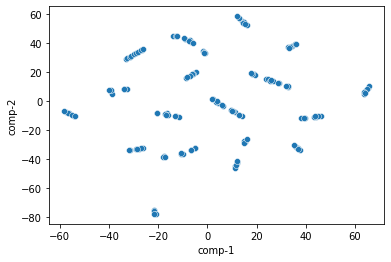

In [34]:
X = np.array([con,con1,con2,con3,con4])
print(X.shape)
X = X.reshape((150,1))

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)

df = pd.DataFrame()
df["y"] = np.arange(150)
df["comp-1"] = X_embedded[:,0]
df["comp-2"] = X_embedded[:,1]

sns.scatterplot(x="comp-1", y="comp-2",palette=sns.color_palette("hls", 150),data=df)

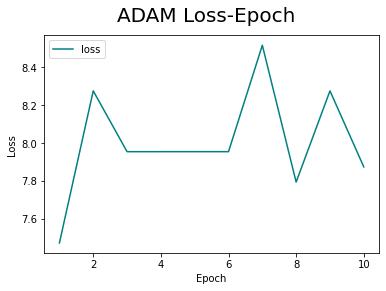

In [35]:
fig = plt.figure()
plt.plot(np.arange(1,11,1),histAdam.history['loss'], color='teal', label='loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
fig.suptitle('ADAM Loss-Epoch', fontsize=20)
plt.legend(loc="upper left")
plt.show()

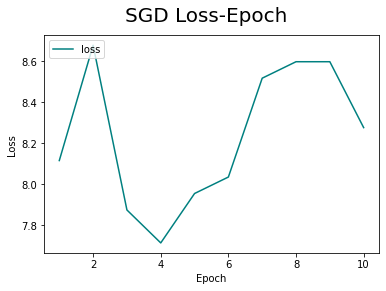

In [36]:
fig = plt.figure()
plt.plot(np.arange(1,11,1),histSGD.history['loss'], color='teal', label='loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
fig.suptitle('SGD Loss-Epoch', fontsize=20)
plt.legend(loc="upper left")
plt.show()

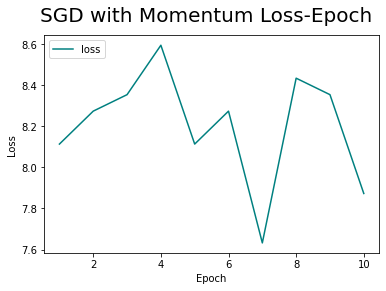

In [37]:
fig = plt.figure()
plt.plot(np.arange(1,11,1),histWithMoment.history['loss'], color='teal', label='loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
fig.suptitle('SGD with Momentum Loss-Epoch', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Plot Performance

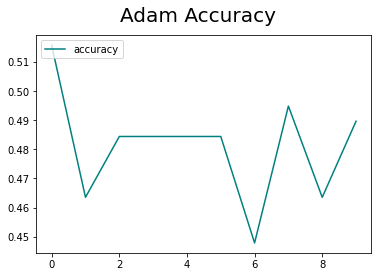

In [38]:
fig = plt.figure()
plt.plot(histAdam.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('Adam Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

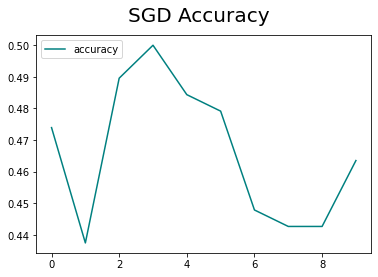

In [39]:
fig = plt.figure()
plt.plot(histSGD.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('SGD Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

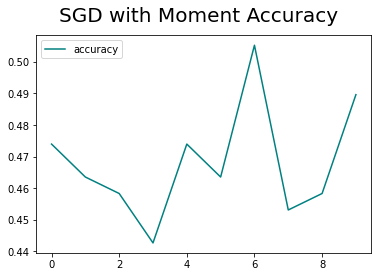

In [40]:
fig = plt.figure()
plt.plot(histWithMoment.history['accuracy'], color='teal', label='accuracy')
fig.suptitle('SGD with Moment Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()